# Code 3
- Numerical & Categorical EDA
  - Outlier Detection and Basic Imputation (Mean/Median/Mode)
- Logistic Model (Balanced/ Unbalanced)

## 1/ Import Libraries

In [10]:
#CodeSection1
from google.colab import drive
drive.mount('/mntDrive') 

Drive already mounted at /mntDrive; to attempt to forcibly remount, call drive.mount("/mntDrive", force_remount=True).


In [11]:
#CodeSection2
import pandas as pd
import numpy as np

## 2/ Import Data

In [12]:
#CodeSection3
train = pd.read_csv('/mntDrive/MyDrive/_Data Science/3 HR Analytics (Solo)/input/train.csv')
test = pd.read_csv('/mntDrive/MyDrive/_Data Science/3 HR Analytics (Solo)/input/test.csv')

## 3/ Combine both Datasets (train, test)

In [13]:
#CodeSection4
all_data = [train, test]

### Check Combined Data 
- Missing Value
- Data Types

In [14]:
#CodeSection5
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

enrollee_id                   0
city                          0
city_development_index        0
gender                     7486
relevent_experience           0
enrolled_university         621
education_level             852
major_discipline           5231
experience                  103
company_size               8830
company_type               9369
last_new_job                671
training_hours                0
target                    15021
dtype: int64

In [15]:
#CodeSection6
# Check Data types for each variable
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

## 4/ EDA - Check Numerical Variables

In [16]:
#CodeSection7
# Lets Import the Seaborn Library
import seaborn as sns

### Lets start with Numerical Variable/Feature - 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


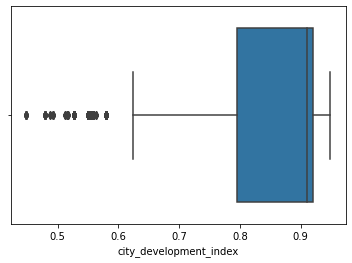

In [18]:
#CodeSection8
# in this case we start with "ApplicantIncome"
sns.boxplot(train['city_development_index'])

### Inter Quantile Range Strategy 
- Outlier Detection
- Outlier Treatment

In [19]:
#CodeSection9
# Use quantile function
# Find Q1 and Q3
Q1 = train['city_development_index'].quantile(0.25)
Q3 = train['city_development_index'].quantile(0.75)

#Find IQR 
IQR = Q3 - Q1

#Find Lower Limit and Higher Limit
Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)

# Print all Values
print('Q1 : {}'.format(Q1))
print('Q3 : {}'.format(Q3))
print('IQR : {}'.format(IQR))
print(Lower_Whisker, Upper_Whisker)

Q1 : 0.7959999999999999
Q3 : 0.92
IQR : 0.12400000000000011
0.6099999999999998 1.1060000000000003


### Now lets Treat the value by imputing with Mean/Median

In [ ]:
#CodeSection10
# Replace Variable with Upper Whisker (there are other strategies)
<Write your code here>

In [ ]:
#CodeSection11
# Lets check again
<Write your code here>
# Now No Outliers

### Replicate for other Numerical Variable/Features

In [20]:
#CodeSection12

# Identify all Numerical Variables 
numerical_features = ['training_hours']

# Write a loop to do the same 
for num_var in numerical_features:
  Q1 = train[num_var].quantile(0.25)
  Q3 = train[num_var].quantile(0.75)

  IQR = Q3 - Q1

  Lower_Whisker = Q1 - (1.5 * IQR)
  Upper_Whisker = Q3 + (1.5 * IQR)
  for dataset in all_data:
    dataset[num_var] = dataset[num_var].apply(lambda x : Upper_Whisker if x > Upper_Whisker else x)

## 5/ Impute Numerical Variables

### Impute all Numerical Variables at once



In [ ]:
#CodeSection13
# Write a loop to Impute all Numerical Vairbales
enrollee_id                   0
city                          0
city_development_index        0
gender                     7486
relevent_experience           0
enrolled_university         621
education_level             852
major_discipline           5231
experience                  103
company_size               8830
company_type               9369
last_new_job                671
training_hours                0
target                    15021

## 6/ Impute Categorical Variables
- Lets try another Strategy of Imputing "Missing" where a Category value is missing

### Impute all Categorical Variables at once

In [21]:
#CodeSection14
for dataset in all_data:
  # Categorical Feature 1
  dataset['gender'] = dataset['gender'].fillna('Missing')

  # Categorical Feature 2
  dataset['enrolled_university'] = dataset['enrolled_university'].fillna('Missing')
  
  # Categorical Feature 3
  dataset['education_level'] = dataset['education_level'].fillna('Missing')

  # Categorical Feature 4
  dataset['major_discipline'] = dataset['major_discipline'].fillna('Missing')

  dataset['experience'] = dataset['experience'].fillna('Missing')

  dataset['company_size'] = dataset['company_size'].fillna('Missing')

  dataset['company_type'] = dataset['company_type'].fillna('Missing')

  dataset['last_new_job'] = dataset['last_new_job'].fillna('Missing')

## 7/ Now Re Check all Features

In [22]:
#CodeSection15
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

enrollee_id                   0
city                          0
city_development_index        0
gender                        0
relevent_experience           0
enrolled_university           0
education_level               0
major_discipline              0
experience                    0
company_size                  0
company_type                  0
last_new_job                  0
training_hours                0
target                    15021
dtype: int64

## 8/ Prepare Data for Model Model

In [23]:
#CodeSection16
# Check First 5 Rows of Test Data
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,Missing,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,Missing,15.0
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94.0
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,Missing,Missing,1,17.0
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76.0
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65.0


In [24]:
#CodeSection17
# Get X and y Variables for your Dataset
X = train.drop(['enrollee_id','target'], axis =  1)
y = train['target']

### Create Dummy Variables for  Categorical Variables

In [25]:
#CodeSection18
# Get Dummy Variables
X = pd.get_dummies(X)  # Keep only n - 1 Variables - Use "drop_first = True"

## 9/ Build Model

In [26]:
#CodeSection19
#Import Logistic Regression Library
from sklearn.linear_model import LogisticRegression

#Initialize LR
clf = LogisticRegression(max_iter = 1000)

In [27]:
#CodeSection20
# Fit Model
model = clf.fit(X, y)

### Check Accuracy of Model on Train Data

In [28]:
#CodeSection21
# Predict on Train Data
y_pred = model.predict(X)

### We can use a Accuracy Function from Metrics
- Check Train Accuracy

In [29]:
#CodeSection22
# Import metrics library
from sklearn.metrics import accuracy_score

In [30]:
#CodeSection23
# get Actual "y" variables (use "y_true" as variable)
y_true = train['target']

In [31]:
#CodeSection24
# Print Train Accuracy
print(f" Train Accuracy : {accuracy_score(y_true, y_pred):0.1%}")

 Train Accuracy : 86.8%


## 10/ Predict and Submit

### Predict

In [32]:
#CodeSection25
# Get all the X Variables from the Test Dataset
X_test = test.drop(['enrollee_id'], axis =  1)

In [33]:
#CodeSection26
#Covert to Dummies
X_test = pd.get_dummies(X_test)

In [ ]:
#CodeSection27
# use this code if the next Code shows error
X_test['Married_Missing']  = 0

In [34]:
#CodeSection28
# Predict on X_test Data ("X_test_prep")
X_test_prep = model.predict(X_test)

### Import Sample Submission

In [35]:
#CodeSection29
sample_submission = pd.read_csv('/mntDrive/MyDrive/_Data Science/3 HR Analytics (Solo)/input/sample_submission.csv')
sample_submission.head()

,enrollee_id,target
0,16548,0
1,12036,0
2,11061,0
3,5032,0
4,17599,0


### Create Submission File

In [36]:
#CodeSection30
submission = pd.DataFrame({
    'enrollee_id' : test['enrollee_id'],
    'target' : X_test_prep
})

### Export Submission File

In [37]:
#CodeSection31
submission.to_csv('/mntDrive/MyDrive/_Data Science/3 HR Analytics (Solo)/output/O3_LR_Outlier.csv', index = False)

In [ ]:
# 